# Homework 03

In [ ]:
# imports
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## 1 Assignment: CIFAR-10 Classification

### 1.1 Prepare the Dataset
- information in the data, dataset size, image size, are there color channels, type the data is stored as, etc  
-  apply respective preprocessing steps using a data pipeline
  - normalisieren,
  - flatten
  - one hot encoding
  - datatype
- Visualize a sample of the dataset


In [ ]:
(train_ds, test_ds), info_ds = tfds.load('cifar10', split=['train', 'test'], as_supervised=True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZGYKBU/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZGYKBU/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


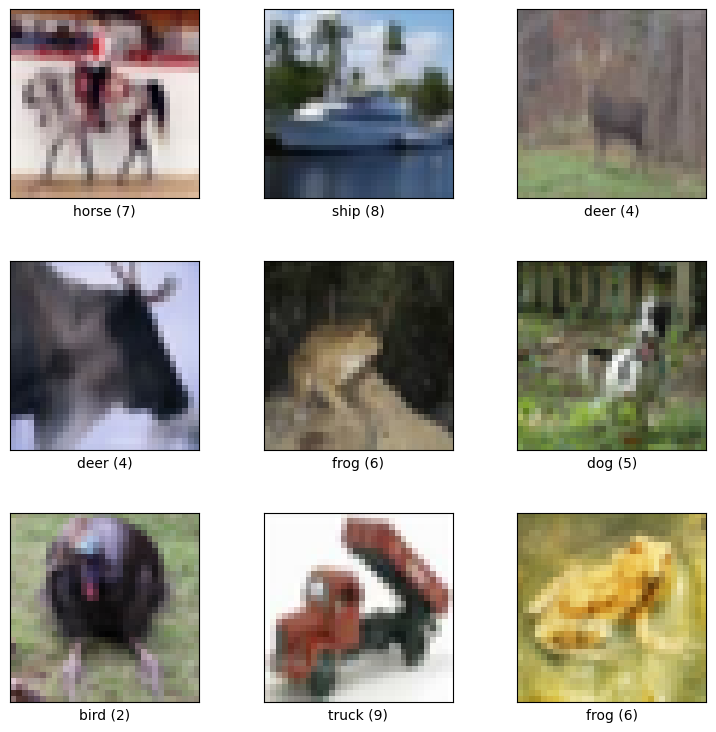

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir=PosixGPath('/tmp/tmpq6h5tm1etfds'),
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mult

In [ ]:
# familiarise with dataset
tfds.show_examples(train_ds, info_ds)
print(info_ds)

In [ ]:
# preprocessing pipeline
##### KANN MAN NOCH ANPASSEN AN LETZTE FC ##########

def prepare_cifar10(cifar10):
  # change data type
  cifar10 = cifar10.map(lambda img, target: (tf.cast(img, tf.float32), target))
  # normalisation
  cifar10 = cifar10.map(lambda img, target: ((img/128.)-1., target))
  # on hot encoding
  cifar10 = cifar10.map(lambda img, target: (img, tf.one_hot(indices=target, depth=10)))
  # cache
  cifar10.cache()
  # shuffle batch prefetch
  cifar10 = cifar10.shuffle(1000)
  cifar10 = cifar10.batch(32)
  cifar10 = cifar10.prefetch(20)

  return cifar10

# apply preprocessing
train_dataset = train_ds.apply(prepare_cifar10)
test_dataset = test_ds.apply(prepare_cifar10)

### 1.2 The CNN Model  
Several different models implemented with model subclassing api

In [ ]:
class BasicCNN(tf.keras.Model):

  def __init__(self):
    super(BasicCNN, self).__init__()

    # model architecture
    self.convlayer1 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, padding='same', activation='relu')
    self.convlayer2 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, padding='same', activation='relu')
    self.pooling = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.convlayer3 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu')
    self.convlayer4 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu')
    self.global_pool = tf.keras.layers.GlobalAvgPool2D()

    self.out = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
      x = self.convlayer1(x)
      x = self.convlayer2(x)
      x = self.pooling(x)
      x = self.convlayer3(x)
      x = self.convlayer4(x)
      x = self.global_pool(x)
      x = self.out(x)
      return x

In [ ]:
class BasicCNNmoreLayers(tf.keras.Model):

  def __init__(self):
    super(BasicCNNmoreLayers, self).__init__()

    # model architecture
    self.convlayer1 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, padding='same', activation='relu')
    self.convlayer2 = tf.keras.layers.Conv2D(filters=24, kernel_size=3, padding='same', activation='relu')
    self.pooling1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.convlayer3 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu')
    self.convlayer4 = tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu')
    self.pooling2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.convlayer5 = tf.keras.layers.Conv2D(filters=96, kernel_size=3, padding='same', activation='relu')
    self.convlayer6 = tf.keras.layers.Conv2D(filters=96, kernel_size=3, padding='same', activation='relu')
    self.pooling3 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.convlayer7 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')
    self.convlayer8 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')
    self.global_pool = tf.keras.layers.GlobalAvgPool2D()

    self.out = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
      x = self.convlayer1(x) # output:
      x = self.convlayer2(x)
      x = self.pooling1(x)
      x = self.convlayer3(x)
      x = self.convlayer4(x)
      x = self.pooling2(x)
      x = self.convlayer5(x)
      x = self.convlayer6(x)
      x = self.pooling3(x)
      x = self.convlayer7(x)
      x = self.convlayer8(x)
      x = self.global_pool(x)
      x = self.out(x)
      return x

In [ ]:
class ResNetLayer(tf.keras.Model):

  def __init__(self, num_filters):
    super(ResNetLayer, self).__init__()

    # struktur: 3 conv layer, bottleneck layer reduce and increase depth, 1 "normal" conv layer in between
    #self.bottleneckReduce = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=1, padding="same", activation="relu")
    self.conv1 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding="same", activation="relu")
    self.conv2 = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding="same")
    #self.bottleneckIncrease = ?

  def call(self, x):
    #c = self.bottleneckReduce(x)
    c = self.conv1(x)
    c = self.conv1(c)
    x = c+x
    return tf.keras.activations.relu(x)

class ResNetBlock(tf.keras.Model):

  def __init__(self, num_filters, layer):
    super(ResNetBlock, self).__init__()

    # this deeper layer is apparently important, but why exactly ?
    self.deeper_layer = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='same', activation='relu')
    self.layer = [ResNetLayer(num_filters) for _ in range(layer)]

  def call(self, x):
    x = self.deeper_layer(x)
    for l in self.layer:
      x = l(x)
    return x

class ResNetCNN(tf.keras.Model):

  def __init__(self):
    super(ResNetCNN, self).__init__()

    self.resblock1 = ResNetBlock(16, 2)
    self.pooling1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.resblock2 = ResNetBlock(32, 2)
    self.pooling2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

    self.resblock3 = ResNetBlock(64, 2)
    self.globalpooling = tf.keras.layers.GlobalAvgPool2D()

    self.out = tf.keras.layers.Dense(10, activation="softmax")

  def call(self, x):

    x = self.resblock1(x)
    x = self.pooling1(x)
    x = self.resblock2(x)
    x = self.pooling2(x)
    x = self.resblock3(x)
    x = self.globalpooling(x)
    x = self.out(x)

    return x

### 1.3 Training the network


In [ ]:
# train loop function

def train_loop(model, train_ds, test_ds, loss_func, optimizer, num_epochs=15):

  train_losses = []
  train_accuracies = []
  test_losses = []
  test_accuracies = []

  for epoch in range(num_epochs):

    #training
    epoch_losses = []
    epoch_accuracies = []
    for input,target in train_ds:
        loss, accuracy = train_step(model, input, target, loss_func, optimizer)
        epoch_losses.append(loss)
        epoch_accuracies.append(accuracy)

    #track training loss and accuracies
    train_losses.append(tf.reduce_mean(epoch_losses))
    train_accuracies.append(tf.reduce_mean(epoch_accuracies))

    #testing, so we can track accuracy and test loss
    test_loss, test_accuracy = test_loop(model, test_ds, loss_func)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f' After epoch {str(epoch+1)} the accuracy is: {test_accuracies[-1]}')

  return train_losses, train_accuracies, test_losses, test_accuracies

def train_step(model, input, target, loss_function, optimizer):

  with tf.GradientTape() as tape:
    prediction = model(input)
    loss = loss_function(target, prediction)
    accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    accuracy = np.mean(accuracy)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  return loss, accuracy

def test_loop(model, test_ds, loss_func):
  test_accuracy_agg = []
  test_loss_agg = []

  for (input, target) in test_ds:
    prediction = model(input)
    sample_test_loss = loss_func(target, prediction)
    # sample_test_accuracy hat boolean pro sample in batch (länge ist also wie batch size)
    sample_test_accuracy =  np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    # mean accuracy for the batch
    sample_test_accuracy = np.mean(sample_test_accuracy)
    test_loss_agg.append(sample_test_loss.numpy())
    test_accuracy_agg.append(sample_test_accuracy)


  test_loss = tf.reduce_mean(test_loss_agg)
  test_accuracy = tf.reduce_mean(test_accuracy_agg)

  return test_loss, test_accuracy

In [ ]:
# Basic CNN
# initialize parameters

cifar10Model = BasicCNN()

loss_func = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
num_epochs = 15

# train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(cifar10Model, train_dataset, test_dataset, loss_func, optimizer, num_epochs)

 After epoch 1 the accuracy is: 0.4492811501597444
 After epoch 2 the accuracy is: 0.5401357827476039
 After epoch 3 the accuracy is: 0.5806709265175719
 After epoch 4 the accuracy is: 0.6188099041533547
 After epoch 5 the accuracy is: 0.6393769968051118
 After epoch 6 the accuracy is: 0.6568490415335463
 After epoch 7 the accuracy is: 0.6717252396166135
 After epoch 8 the accuracy is: 0.6536541533546326
 After epoch 9 the accuracy is: 0.6796126198083067
 After epoch 10 the accuracy is: 0.6713258785942492
 After epoch 11 the accuracy is: 0.691194089456869
 After epoch 12 the accuracy is: 0.7067691693290735
 After epoch 13 the accuracy is: 0.7246405750798722
 After epoch 14 the accuracy is: 0.7107627795527156
 After epoch 15 the accuracy is: 0.7175519169329073


### 1.4 Visualization

In [ ]:
def visualization(train_losses, train_accuracies, test_losses, test_accuracies):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

  xaxis = np.linspace(start=1, stop=len(train_losses), num=len(train_losses))

  # Plot the Loss
  ax1.plot(xaxis, train_losses, color="red", label="Train")
  ax1.plot(xaxis, test_losses, color="blue", label="Test")
  ax1.set_title("Train vs. Test Loss")
  ax1.legend()
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Loss")
  #ax1.show()

  # Plot the Accuracy
  ax2.plot(xaxis, train_accuracies, color="red", label="Train")
  ax2.plot(xaxis, test_accuracies, color="blue", label="Test")
  ax2.set_title("Train vs. Test Accuracy")
  ax2.legend()
  ax2.set_xlabel("Epochs")
  ax2.set_ylabel("Accuracy")
  #ax2.show()

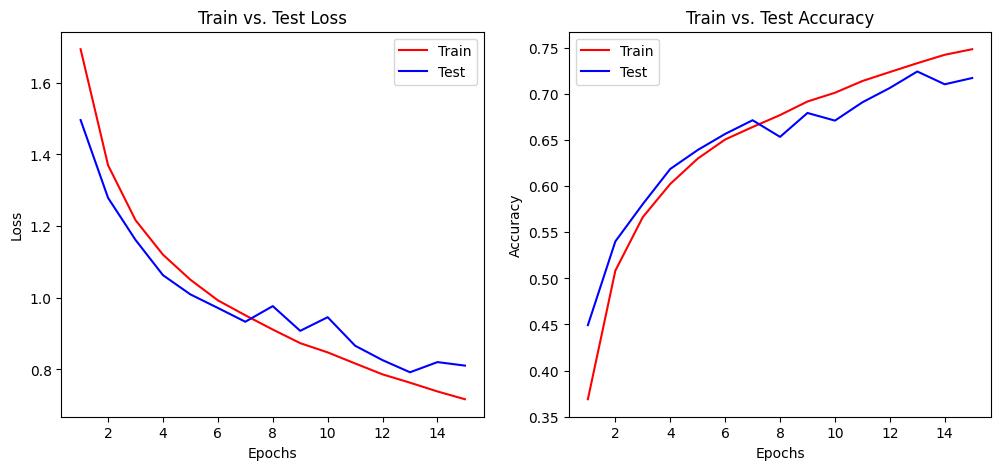

In [ ]:
visualization(train_losses, train_accuracies, test_losses, test_accuracies)

## 2 Adjust hyperparameters and architecture

### Settings
- Two different Learning Rates  
- Two different Architectures (e.g. number and size of layers)  
- Two different optimizers (Including Adam and one other)

 After epoch 1 the accuracy is: 0.5742811501597445
 After epoch 2 the accuracy is: 0.6667332268370607
 After epoch 3 the accuracy is: 0.7184504792332268
 After epoch 4 the accuracy is: 0.7381190095846646
 After epoch 5 the accuracy is: 0.7564896166134185
 After epoch 6 the accuracy is: 0.7656749201277955
 After epoch 7 the accuracy is: 0.7547923322683706
 After epoch 8 the accuracy is: 0.7642771565495208
 After epoch 9 the accuracy is: 0.7679712460063898
 After epoch 10 the accuracy is: 0.7657747603833865
 After epoch 11 the accuracy is: 0.7619808306709265
 After epoch 12 the accuracy is: 0.7549920127795527
 After epoch 13 the accuracy is: 0.7721645367412141
 After epoch 14 the accuracy is: 0.7553913738019169
 After epoch 15 the accuracy is: 0.7571884984025559


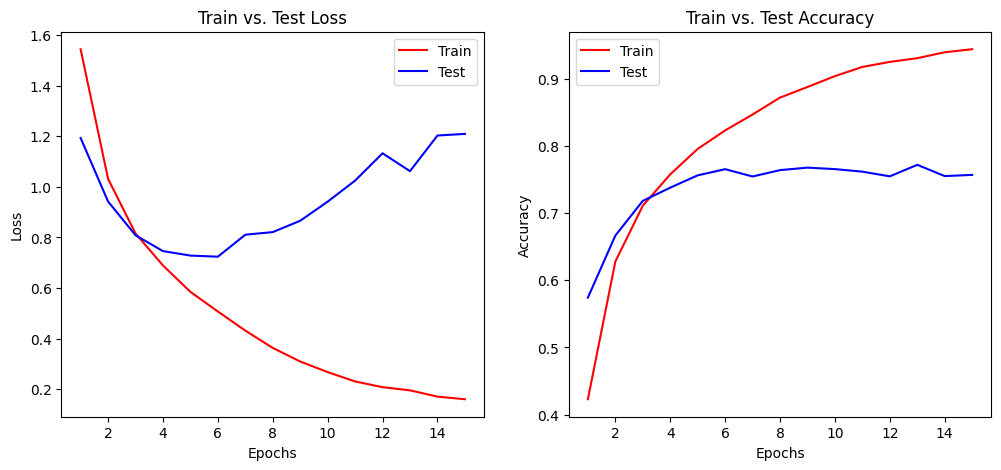

In [ ]:
# Change architecture:
# basic cnn with more conv layers
# initialize parameters

cifar10Model = BasicCNNmoreLayers()

loss_func = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
num_epochs = 15

# train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(cifar10Model, train_dataset, test_dataset, loss_func, optimizer, num_epochs)
# visualize
visualization(train_losses, train_accuracies, test_losses, test_accuracies)

 After epoch 1 the accuracy is: 0.4984025559105431
 After epoch 2 the accuracy is: 0.6190095846645367
 After epoch 3 the accuracy is: 0.6439696485623003
 After epoch 4 the accuracy is: 0.6677316293929713
 After epoch 5 the accuracy is: 0.6957867412140575
 After epoch 6 the accuracy is: 0.6884984025559105
 After epoch 7 the accuracy is: 0.7212460063897763
 After epoch 8 the accuracy is: 0.7367212460063898
 After epoch 9 the accuracy is: 0.7477036741214057
 After epoch 10 the accuracy is: 0.7394169329073482
 After epoch 11 the accuracy is: 0.7491014376996805
 After epoch 12 the accuracy is: 0.7347244408945687
 After epoch 13 the accuracy is: 0.7455071884984026
 After epoch 14 the accuracy is: 0.738917731629393
 After epoch 15 the accuracy is: 0.7449081469648562


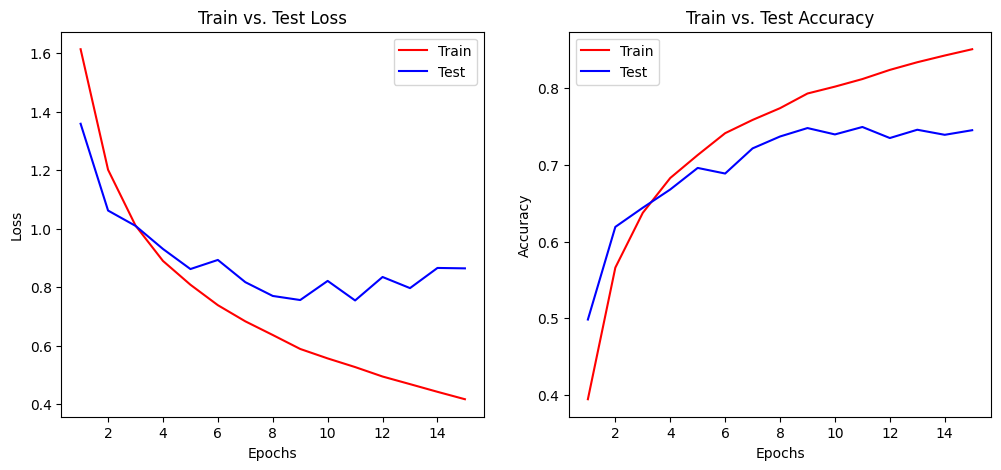

In [ ]:
# Change architecture:
# resnet
# initialize parameters

cifar10Model = ResNetCNN()

loss_func = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
num_epochs = 15

# train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(cifar10Model, train_dataset, test_dataset, loss_func, optimizer, num_epochs)
# visualize
visualization(train_losses, train_accuracies, test_losses, test_accuracies)

 After epoch 1 the accuracy is: 0.38119009584664537
 After epoch 2 the accuracy is: 0.45107827476038337
 After epoch 3 the accuracy is: 0.49660543130990414
 After epoch 4 the accuracy is: 0.5370407348242812
 After epoch 5 the accuracy is: 0.5672923322683706
 After epoch 6 the accuracy is: 0.5921525559105432
 After epoch 7 the accuracy is: 0.5802715654952076
 After epoch 8 the accuracy is: 0.5890575079872205
 After epoch 9 the accuracy is: 0.6384784345047924
 After epoch 10 the accuracy is: 0.6500599041533547
 After epoch 11 the accuracy is: 0.6567492012779552
 After epoch 12 the accuracy is: 0.6442691693290735
 After epoch 13 the accuracy is: 0.6602436102236422
 After epoch 14 the accuracy is: 0.6803115015974441
 After epoch 15 the accuracy is: 0.6825079872204473


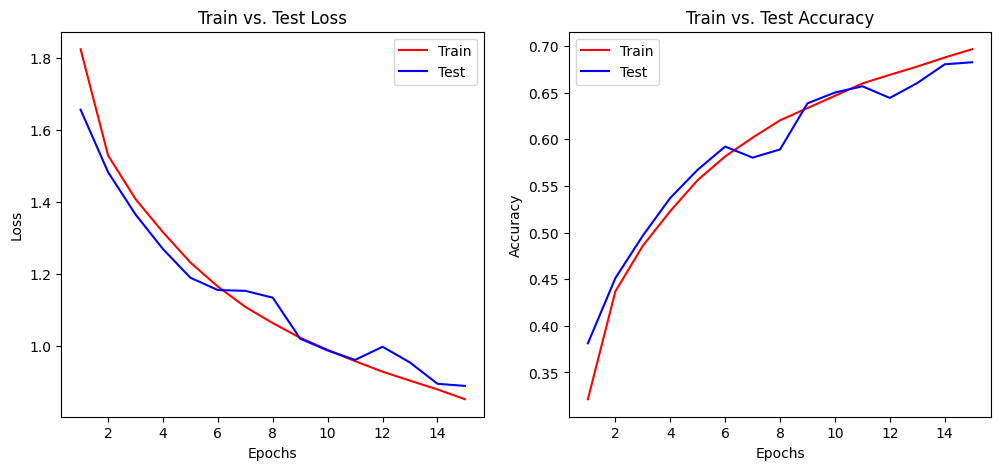

In [ ]:
# Change architecture:
# resnet, smaller lr
# initialize parameters

cifar10Model = ResNetCNN()

loss_func = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate)
num_epochs = 15

# train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(cifar10Model, train_dataset, test_dataset, loss_func, optimizer, num_epochs)
# visualize
visualization(train_losses, train_accuracies, test_losses, test_accuracies)

 After epoch 1 the accuracy is: 0.10003993610223642
 After epoch 2 the accuracy is: 0.09994009584664537
 After epoch 3 the accuracy is: 0.10083865814696485
 After epoch 4 the accuracy is: 0.11651357827476039
 After epoch 5 the accuracy is: 0.13258785942492013
 After epoch 6 the accuracy is: 0.13338658146964857
 After epoch 7 the accuracy is: 0.1361821086261981
 After epoch 8 the accuracy is: 0.14496805111821087
 After epoch 9 the accuracy is: 0.15545127795527156
 After epoch 10 the accuracy is: 0.17052715654952078
 After epoch 11 the accuracy is: 0.1896964856230032
 After epoch 12 the accuracy is: 0.21156150159744408
 After epoch 13 the accuracy is: 0.2266373801916933
 After epoch 14 the accuracy is: 0.24121405750798722
 After epoch 15 the accuracy is: 0.2621805111821086


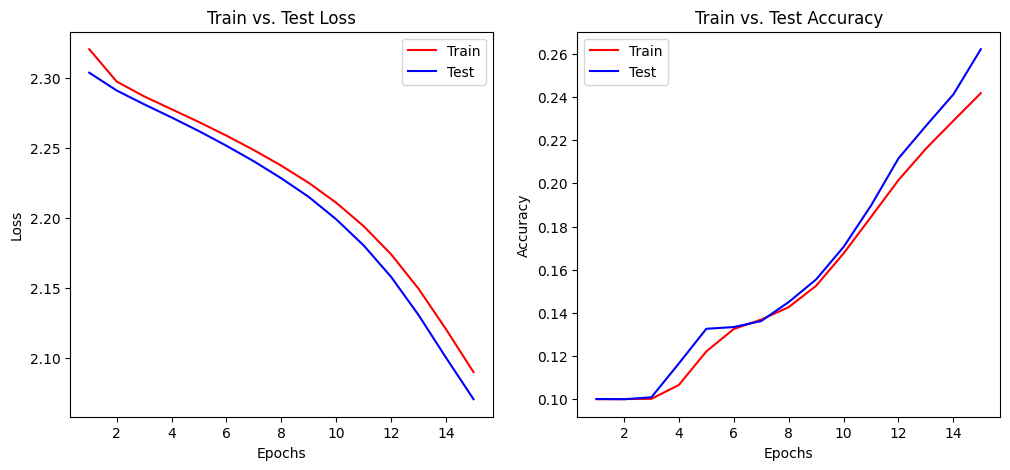

In [ ]:
# Change architecture:
# resnet, smaller lr, SGD
# initialize parameters

cifar10Model = ResNetCNN()

loss_func = tf.keras.losses.CategoricalCrossentropy()
learning_rate = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate)
num_epochs = 15

# train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(cifar10Model, train_dataset, test_dataset, loss_func, optimizer, num_epochs)
# visualize
visualization(train_losses, train_accuracies, test_losses, test_accuracies)